In [1]:
import geopandas as gpd
import pandas as pd
import json
import requests
from matplotlib import pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

regions = {'Hong Kong Island': ['Central and Western',
                                'Wan Chai',
                                'Eastern',
                                'Southern'],
           'Kowloon East': ['Wong Tai Sin',
                            'Kwun Tong'],
           'Kowloon West': ['Yau Tsim Mong',
                            'Sham Shui Po',
                            'Kowloon City'],
           'New Territories East': ['North',
                                    'Tai Po',
                                    'Sha Tin',
                                    'Sai Kung'],
           'New Territories West': ['Kwai Tsing',
                                    'Tsuen Wan',
                                    'Tuen Mun',
                                    'Yuen Long',
                                    'Islands']}
regions_map = {v: k for k, vs in regions.items() for v in vs}
data_path = "data/DCCA_21C.geojson"
yoshinoya_url = "https://www.yoshinoya.com.hk/wp-admin/admin-ajax.php?lang=en&action=store_search&lat=22.396428&lng=114.109497&max_results=100&search_radius=500&autoload=1"

In [2]:
# download yoshinoya store location data

response = requests.get(yoshinoya_url)
yoshinoya_df = pd.DataFrame(json.loads(response.content))[['store','lng','lat']].replace('',np.nan).dropna()
yoshinoya_df = gpd.GeoDataFrame(yoshinoya_df['store'], geometry=gpd.points_from_xy(yoshinoya_df.lng, yoshinoya_df.lat))
yoshinoya_df.set_crs(epsg=4326,inplace=True)
yoshinoya_df

,store,geometry
0,Tsuen Wan Fou Wah Centre Store,POINT (114.11839 22.37306)
1,Tsing Yi Cheung Fat Plaza Store,POINT (114.10323 22.36211)
2,Kwai Tsing life@KCC Store,POINT (114.13225 22.36250)
3,Kwai Chung Plaza Store,POINT (114.12790 22.35770)
4,Shatn Grandeur Shopping Arcade Store,POINT (114.17792 22.37427)
5,Po Heung Street Store,POINT (114.16616 22.44728)
6,Shatin Lucky Plaza Store,POINT (114.19117 22.38249)
7,V Walk 分店,POINT (114.15221 22.32709)
8,Sham Shui Po Dragon Centre Store,POINT (114.15990 22.33103)
9,Kowloon Tong Festival Walk Store,POINT (114.17401 22.33770)


In [3]:
dcca = gpd.read_file(data_path).to_crs(epsg=4326)
dcca.rename(columns={'dcca': 'id'}, inplace=True)
dcca['region'] = dcca.dc_eng.apply(lambda k: regions_map[k])
dcca

,adhz,age_1,age_2,age_3,age_4,age_5,born_chi,born_else,born_hk,ca_chi,...,wp_p,wp_q,wp_r,wp_s,wp_se,wp_t,writechi_ablepctn,writeeng_ablepctn,geometry,region
0,2.3,1056,455,3787,3589,2190,2421,2967,5689,中環,...,984,1306,1005,1148,599,23,72.4,84.3,"POLYGON ((114.16744 22.28321, 114.16742 22.283...",Hong Kong Island
1,2.4,1704,981,5328,4441,3010,2857,4476,8131,半山東,...,2066,1473,1036,1766,381,40,71.5,86.7,"POLYGON ((114.15568 22.27649, 114.15634 22.276...",Hong Kong Island
2,3.1,2342,1179,6970,5982,2806,2463,6561,10255,衛城,...,2658,1890,1318,3196,513,41,66.8,91.7,"POLYGON ((114.15103 22.28218, 114.15046 22.282...",Hong Kong Island
3,3.7,2400,1633,6457,6512,2200,2315,8714,8173,山頂,...,2030,1644,1110,5454,491,19,56.3,94.4,"POLYGON ((114.15184 22.27684, 114.14969 22.278...",Hong Kong Island
4,3.3,2203,1287,5515,5830,3713,3002,5985,9561,大學,...,1487,1777,1302,3301,594,-,68.7,88.7,"POLYGON ((114.14538 22.28385, 114.14538 22.284...",Hong Kong Island
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2.5,2984,1293,7068,4562,1639,6057,3270,8219,東涌北,...,1019,1176,1332,941,650,36,82.7,74.9,"MULTIPOLYGON (((113.93774 22.29069, 113.93790 ...",New Territories West
448,2.7,3230,1326,6065,6573,2142,2596,9211,7529,愉景灣,...,1728,1001,2103,2585,851,-,52.8,95.4,"POLYGON ((114.05545 22.31290, 114.01046 22.313...",New Territories West
449,2.2,388,485,2143,2155,1111,1141,350,4791,坪洲及喜靈洲,...,159,693,727,331,372,74,86.5,69.1,"MULTIPOLYGON (((114.03308 22.25879, 114.03306 ...",New Territories West
450,2.2,603,608,2104,2655,754,709,2608,3407,南丫及蒲台,...,277,813,653,720,492,70,57.5,86.0,"MULTIPOLYGON (((114.25092 22.16131, 114.25087 ...",New Territories West


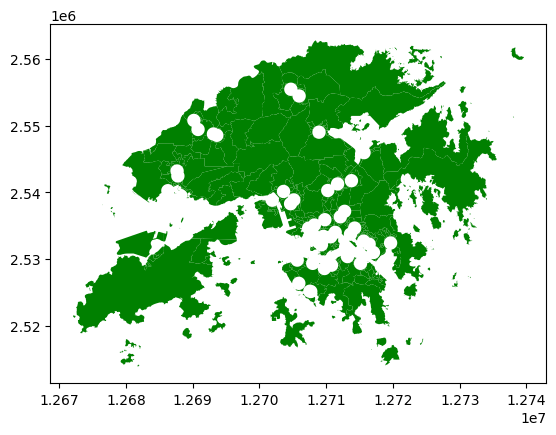

In [7]:
fig,ax=plt.subplots()
yoshinoya_region = yoshinoya_df.copy().to_crs('epsg:3395')
yoshinoya_region['geometry']= yoshinoya_region.buffer(1000)
difference = dcca.to_crs('epsg:3395').overlay(yoshinoya_region,how='difference')
difference.plot(ax=ax,color='green')
plt.show()